In [46]:
from pathlib import Path
from act_pol.analysis.files import process_sim
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde, maxwell, norm
from utils import plot
from utils.plot import cm
from matplotlib.lines import Line2D
from utils.analysis import Simulation, Constants
np.random.seed(seed=42)

In [47]:
def hist(ax,arr,density=True,fill=False,histtype='step',linewidth=1.5,**kwargs):
    """Plot a histogram with pre-defined kwargs."""
    ax.hist(arr,density=density,fill=fill,histtype=histtype,linewidth=linewidth,**kwargs)

def histlegend(ax,**kwargs):
    """Convert step legend handles to lines."""
    
    handles, labels = ax.get_legend_handles_labels()
    new_handles = [
        h if isinstance(h, Line2D) else Line2D([], [], c=h.get_edgecolor())
        for h in handles
    ]
    ax.legend(handles=new_handles, labels=labels,**kwargs)

In [48]:
"""Equilibrium distribution"""

'Equilibrium distribution'

In [49]:
gaussian_bins = np.linspace(-50,50,40)
maxwell_bins = np.linspace(0,50,40)

Text(0.5, 1.0, '$\\nu=0,A=1,\\xi=1,L_c=150\\mathrm{kb}$')

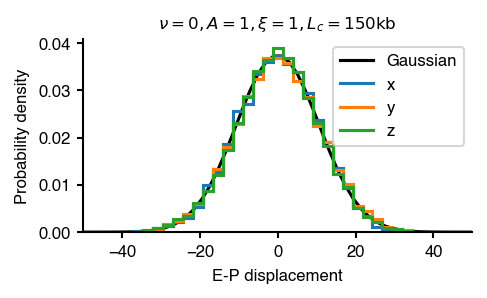

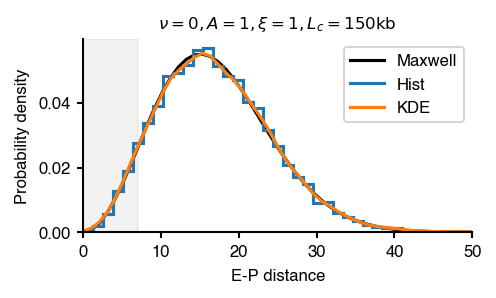

In [50]:
fig, ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P displacement")
r = np.linspace(-50,50)
ax.plot(r,Simulation(B=0,F=1,A=1,L=150,R=0).gaussian_1D_rv.pdf(r),label="Gaussian",color="black")
hist(ax,Simulation(B=0,F=1,A=1,L=150,R=0).displacement[:,0],label="x",bins=gaussian_bins)
hist(ax,Simulation(B=0,F=1,A=1,L=150,R=0).displacement[:,1],label="y",bins=gaussian_bins)
hist(ax,Simulation(B=0,F=1,A=1,L=150,R=0).displacement[:,2],label="z",bins=gaussian_bins)
histlegend(ax)
ax.set_xlim(-50,50)
ax.set_title(r"$\nu=0,A=1,\xi=1,L_c=150\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
ax.plot(r,Simulation(B=0,F=1,A=1,L=150,R=0).maxwell(r),label="Maxwell",color="black")
hist(ax,Simulation(B=0,F=1,A=1,L=150,R=0).distance,label="Hist", bins=maxwell_bins)
ax.plot(r,Simulation(B=0,F=1,A=1,L=150,R=0).distance_g(r),label="KDE")
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_xlim(0,50)
# ax.plot(r,Simulation(B=0,F=1,A=1,L=150,R=0).maxwell_rv.pdf(r),label="Maxwell (Scipy)")
histlegend(ax)
ax.set_title(r"$\nu=0,A=1,\xi=1,L_c=150\mathrm{kb}$")

In [51]:
"""Zero flow, increase friction only, for two contour lengths"""

'Zero flow, increase friction only, for two contour lengths'

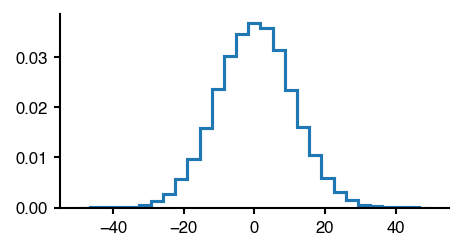

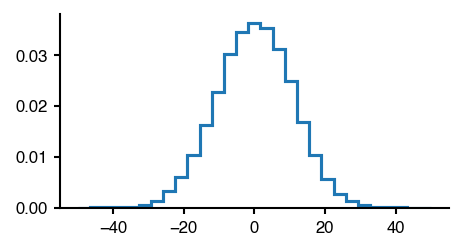

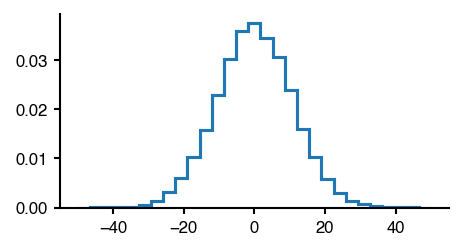

In [52]:
gaussian_bins = np.linspace(-50,50,30)
r = np.linspace(-50,50)
fig, ax = plt.subplots()
hist(ax,Simulation(B=0,F=14,A=1,L=150,R=0).displacement[:,0],bins=gaussian_bins)
fig, ax = plt.subplots()
hist(ax,Simulation(B=0,F=14,A=1,L=150,R=0).displacement[:,1],bins=gaussian_bins)
fig, ax = plt.subplots()
hist(ax,Simulation(B=0,F=14,A=1,L=150,R=0).displacement[:,2],bins=gaussian_bins)
# ax.plot(r,Simulation(B=0,F=14,A=1,L=150,R=0).gaussian_1D(r))

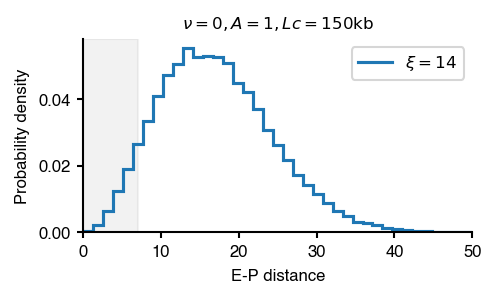

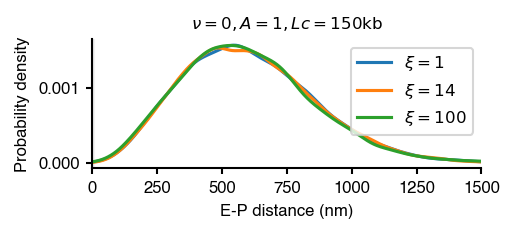

In [53]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
# hist(ax,Simulation(B=0,F=1,A=1,L=150,R=0).distance,label=r"$\xi=1$",bins=maxwell_bins)
hist(ax,Simulation(B=0,F=14,A=1,L=150,R=0).distance,label=r"$\xi=14$",bins=maxwell_bins)
# hist(ax,Simulation(B=0,F=100,A=1,L=150,R=0).distance,label=r"$\xi=100$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=0,A=1,Lc=150\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/3))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance (nm)")
r = np.linspace(0,1500,1500)
ax.plot(r,Simulation(B=0,F=1,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=1$")
ax.plot(r,Simulation(B=0,F=14,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=14$")
ax.plot(r,Simulation(B=0,F=100,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=100$")
histlegend(ax)
ax.set_xlim(0,1500)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=0,A=1,Lc=150\mathrm{kb}$")
fig.savefig("./figures/friction.pdf",transparent=True,bbox_inches="tight")

Text(0.5, 1.0, '$\\nu=0,A=1,Lc=20\\mathrm{kb}$')

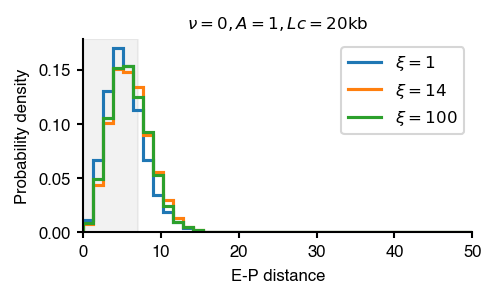

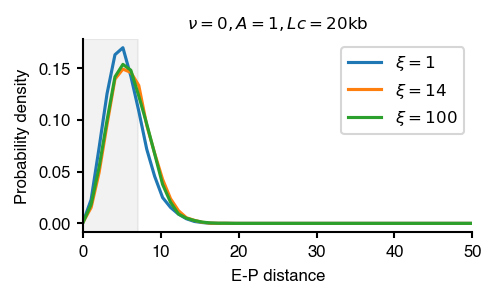

In [54]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=10,F=1,A=1,L=20,R=0).distance,label=r"$\xi=1$",bins=maxwell_bins)
hist(ax,Simulation(B=0,F=14,A=1,L=20,R=0).distance,label=r"$\xi=14$",bins=maxwell_bins)
hist(ax,Simulation(B=0,F=100,A=1,L=20,R=0).distance,label=r"$\xi=100$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=0,A=1,Lc=20\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
ax.plot(r,Simulation(B=10,F=1,A=1,L=20,R=0).distance_g(r),label=r"$\xi=1$")
ax.plot(r,Simulation(B=0,F=14,A=1,L=20,R=0).distance_g(r),label=r"$\xi=14$")
ax.plot(r,Simulation(B=0,F=100,A=1,L=20,R=0).distance_g(r),label=r"$\xi=100$")
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=0,A=1,Lc=20\mathrm{kb}$")

In [55]:
"""Zero flow, decrease activity only, for two contour lengths"""

'Zero flow, decrease activity only, for two contour lengths'

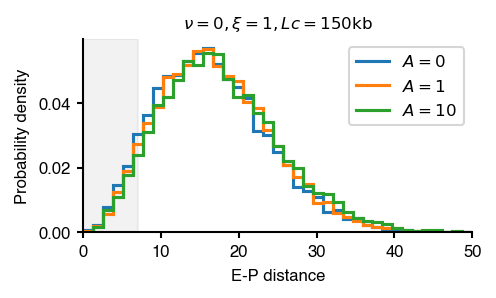

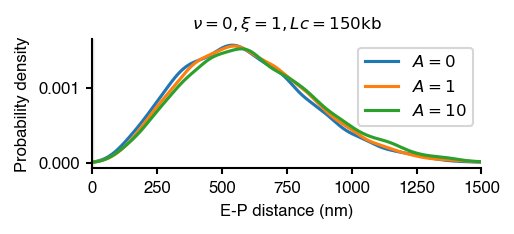

In [56]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
hist(ax,Simulation(B=0,F=1,A=0,L=150,R=0).distance,label=r"$A=0$",bins=maxwell_bins)
hist(ax,Simulation(B=0,F=1,A=1,L=150,R=0).distance,label=r"$A=1$",bins=maxwell_bins)
hist(ax,Simulation(B=0,F=1,A=10,L=150,R=0).distance,label=r"$A=10$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=0,\xi=1,Lc=150\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/3))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance (nm)")
r = np.linspace(0,1500,1500)
ax.plot(r,Simulation(B=0,F=1,A=0,L=150,R=0,unitful=True).distance_g(r),label=r"$A=0$")
ax.plot(r,Simulation(B=0,F=1,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$A=1$")
ax.plot(r,Simulation(B=0,F=1,A=10,L=150,R=0,unitful=True).distance_g(r),label=r"$A=10$")
histlegend(ax)
ax.set_xlim(0,1500)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=0,\xi=1,Lc=150\mathrm{kb}$")
fig.savefig("./figures/activity.pdf",transparent=True,bbox_inches="tight")

Text(0.5, 1.0, '$\\nu=0,\\xi=1,Lc=20\\mathrm{kb}$')

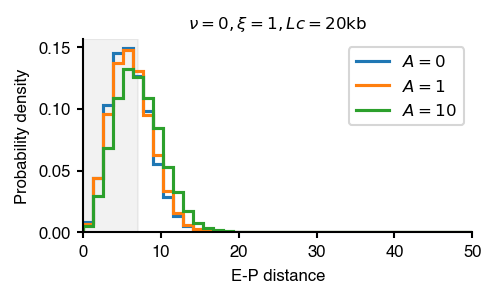

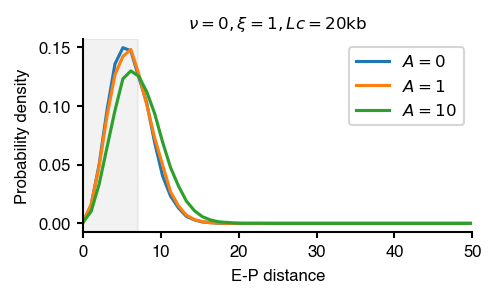

In [57]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
hist(ax,Simulation(B=0,F=1,A=0,L=20,R=0).distance,label=r"$A=0$",bins=maxwell_bins)
hist(ax,Simulation(B=0,F=1,A=1,L=20,R=0).distance,label=r"$A=1$",bins=maxwell_bins)
hist(ax,Simulation(B=0,F=1,A=10,L=20,R=0).distance,label=r"$A=10$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=0,\xi=1,Lc=20\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
ax.plot(r,Simulation(B=0,F=1,A=0,L=20,R=0).distance_g(r),label=r"$A=0$")
ax.plot(r,Simulation(B=0,F=1,A=1,L=20,R=0).distance_g(r),label=r"$A=1$")
ax.plot(r,Simulation(B=0,F=1,A=10,L=20,R=0).distance_g(r),label=r"$A=10$")
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=0,\xi=1,Lc=20\mathrm{kb}$")

In [58]:
"""Finite flow"""

'Finite flow'

In [59]:
"""Finite flow, increase friction only, for two contour lengths"""

'Finite flow, increase friction only, for two contour lengths'

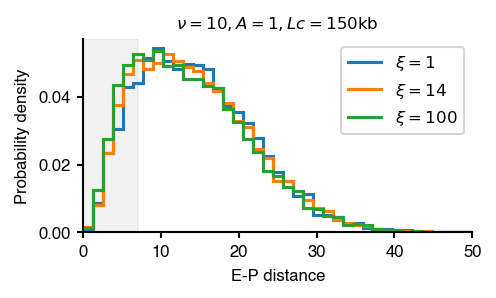

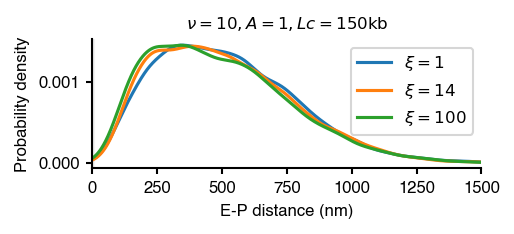

In [60]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=10,F=1,A=1,L=150,R=0).distance,label=r"$\xi=1$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=14,A=1,L=150,R=0).distance,label=r"$\xi=14$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=100,A=1,L=150,R=0).distance,label=r"$\xi=100$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=10,A=1,Lc=150\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/3))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance (nm)")
r = np.linspace(0,1500,1500)
ax.plot(r,Simulation(B=10,F=1,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=1$")
ax.plot(r,Simulation(B=10,F=14,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=14$")
ax.plot(r,Simulation(B=10,F=100,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=100$")
histlegend(ax)
ax.set_xlim(0,1500)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=10,A=1,Lc=150\mathrm{kb}$")
fig.savefig("./figures/friction10.pdf",transparent=True,bbox_inches="tight")

Text(0.5, 1.0, '$\\nu=10,A=1,Lc=20\\mathrm{kb}$')

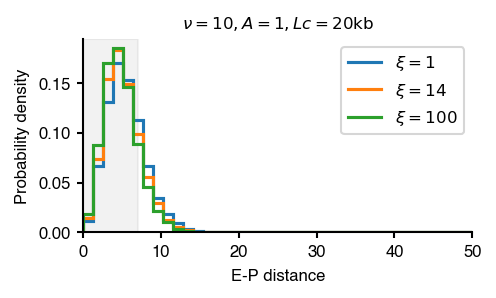

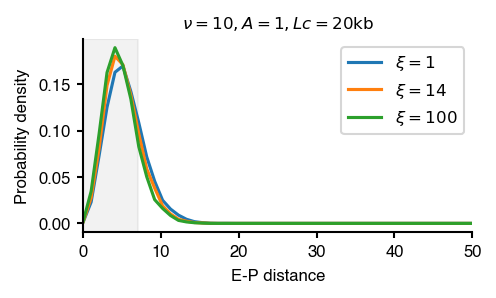

In [61]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=10,F=1,A=1,L=20,R=0).distance,label=r"$\xi=1$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=14,A=1,L=20,R=0).distance,label=r"$\xi=14$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=100,A=1,L=20,R=0).distance,label=r"$\xi=100$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=10,A=1,Lc=20\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
ax.plot(r,Simulation(B=10,F=1,A=1,L=20,R=0).distance_g(r),label=r"$\xi=1$")
ax.plot(r,Simulation(B=10,F=14,A=1,L=20,R=0).distance_g(r),label=r"$\xi=14$")
ax.plot(r,Simulation(B=10,F=100,A=1,L=20,R=0).distance_g(r),label=r"$\xi=100$")
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=10,A=1,Lc=20\mathrm{kb}$")

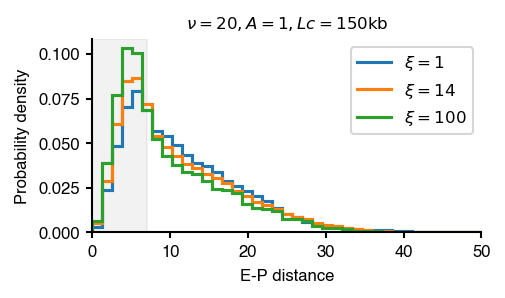

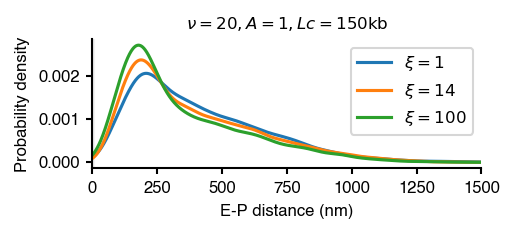

In [62]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=20,F=1,A=1,L=150,R=0).distance,label=r"$\xi=1$",bins=maxwell_bins)
hist(ax,Simulation(B=20,F=14,A=1,L=150,R=0).distance,label=r"$\xi=14$",bins=maxwell_bins)
hist(ax,Simulation(B=20,F=100,A=1,L=150,R=0).distance,label=r"$\xi=100$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=20,A=1,Lc=150\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/3))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance (nm)")
r = np.linspace(0,1500,1500)
ax.plot(r,Simulation(B=20,F=1,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=1$")
ax.plot(r,Simulation(B=20,F=14,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=14$")
ax.plot(r,Simulation(B=20,F=100,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$\xi=100$")
histlegend(ax)
ax.set_xlim(0,1500)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=20,A=1,Lc=150\mathrm{kb}$")
fig.savefig("./figures/friction20.pdf",transparent=True,bbox_inches="tight")

Text(0.5, 1.0, '$\\nu=20,A=1,Lc=20\\mathrm{kb}$')

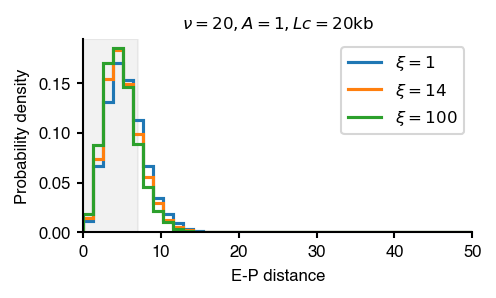

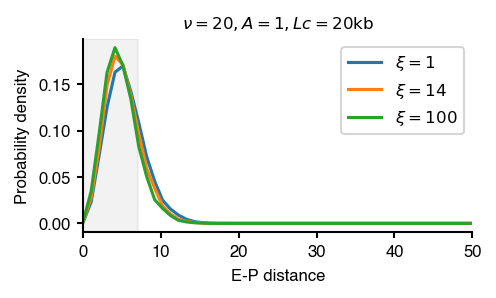

In [63]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=10,F=1,A=1,L=20,R=0).distance,label=r"$\xi=1$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=14,A=1,L=20,R=0).distance,label=r"$\xi=14$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=100,A=1,L=20,R=0).distance,label=r"$\xi=100$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=20,A=1,Lc=20\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
ax.plot(r,Simulation(B=10,F=1,A=1,L=20,R=0).distance_g(r),label=r"$\xi=1$")
ax.plot(r,Simulation(B=10,F=14,A=1,L=20,R=0).distance_g(r),label=r"$\xi=14$")
ax.plot(r,Simulation(B=10,F=100,A=1,L=20,R=0).distance_g(r),label=r"$\xi=100$")
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=20,A=1,Lc=20\mathrm{kb}$")

In [64]:
"""Finite flow, decrease activity only, for two contour lengths"""

'Finite flow, decrease activity only, for two contour lengths'

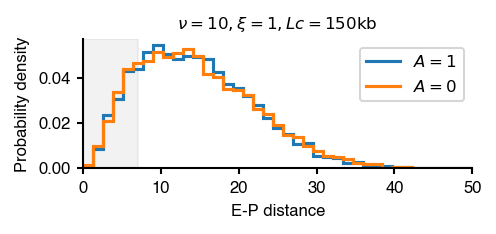

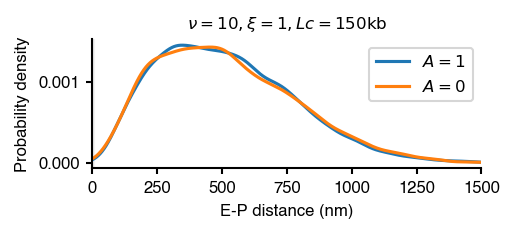

In [65]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/3))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=10,F=1,A=1,L=150,R=0).distance,label=r"$A=1$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=1,A=0,L=150,R=0).distance,label=r"$A=0$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=10,\xi=1,Lc=150\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/3))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance (nm)")
r = np.linspace(0,1500,1500)
ax.plot(r,Simulation(B=10,F=1,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$A=1$")
ax.plot(r,Simulation(B=10,F=1,A=0,L=150,R=0,unitful=True).distance_g(r),label=r"$A=0$")
histlegend(ax)
ax.set_xlim(0,1500)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=10,\xi=1,Lc=150\mathrm{kb}$")
fig.savefig("./figures/activity10.pdf",transparent=True,bbox_inches="tight")

Text(0.5, 1.0, '$\\nu=10,\\xi=1,Lc=20\\mathrm{kb}$')

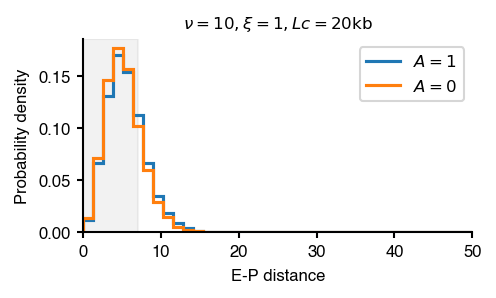

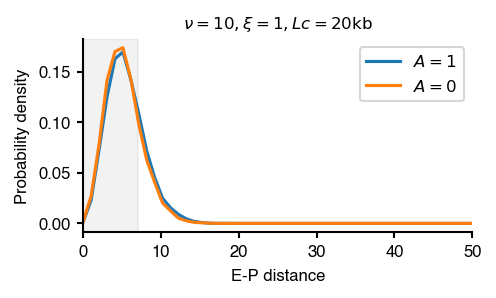

In [66]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=10,F=1,A=1,L=20,R=0).distance,label=r"$A=1$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=1,A=0,L=20,R=0).distance,label=r"$A=0$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=10,\xi=1,Lc=20\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
ax.plot(r,Simulation(B=10,F=1,A=1,L=20,R=0).distance_g(r),label=r"$A=1$")
ax.plot(r,Simulation(B=10,F=1,A=0,L=20,R=0).distance_g(r),label=r"$A=0$")
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=10,\xi=1,Lc=20\mathrm{kb}$")

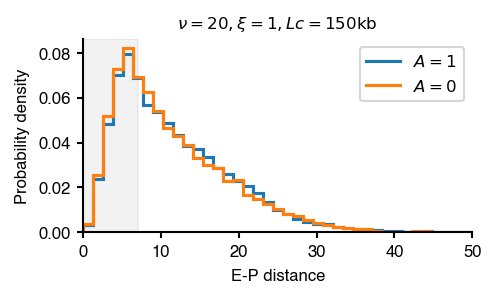

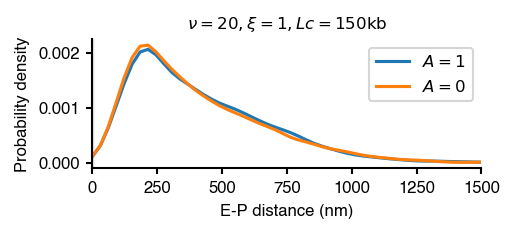

In [67]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=20,F=1,A=1,L=150,R=0).distance,label=r"$A=1$",bins=maxwell_bins)
hist(ax,Simulation(B=20,F=1,A=0,L=150,R=0).distance,label=r"$A=0$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=20,\xi=1,Lc=150\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/3))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance (nm)")
r = np.linspace(0,1500)
ax.plot(r,Simulation(B=20,F=1,A=1,L=150,R=0,unitful=True).distance_g(r),label=r"$A=1$")
ax.plot(r,Simulation(B=20,F=1,A=0,L=150,R=0,unitful=True).distance_g(r),label=r"$A=0$")
histlegend(ax)
ax.set_xlim(0,1500)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=20,\xi=1,Lc=150\mathrm{kb}$")
fig.savefig("./figures/activity20.pdf",transparent=True,bbox_inches="tight")

Text(0.5, 1.0, '$\\nu=20,\\xi=1,Lc=20\\mathrm{kb}$')

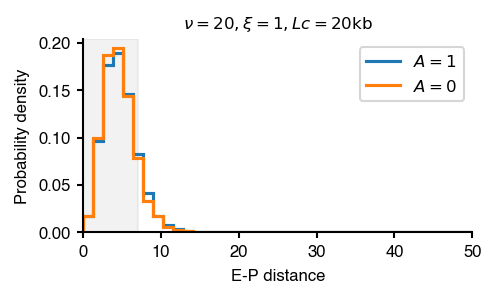

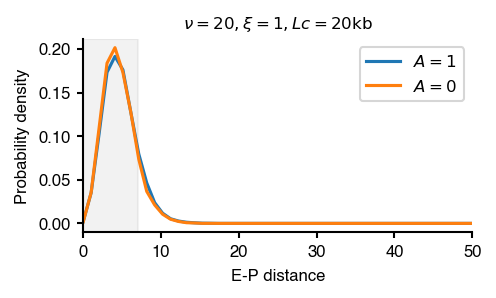

In [68]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=20,F=1,A=1,L=20,R=0).distance,label=r"$A=1$",bins=maxwell_bins)
hist(ax,Simulation(B=20,F=1,A=0,L=20,R=0).distance,label=r"$A=0$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=20,\xi=1,Lc=20\mathrm{kb}$")

fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
ax.plot(r,Simulation(B=20,F=1,A=1,L=20,R=0).distance_g(r),label=r"$A=1$")
ax.plot(r,Simulation(B=20,F=1,A=0,L=20,R=0).distance_g(r),label=r"$A=0$")
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\nu=20,\xi=1,Lc=20\mathrm{kb}$")

In [69]:
"Reciprocal and non-reciprocal"

'Reciprocal and non-reciprocal'

Text(0.5, 1.0, '$\\xi=1,Lc=150\\mathrm{kb}$')

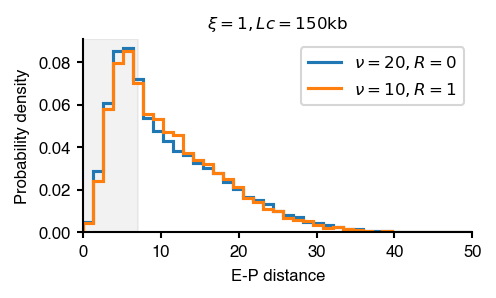

In [70]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=20,F=14,A=1,L=150,R=0).distance,label=r"$\nu=20,R=0$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=14,A=1,L=150,R=1).distance,label=r"$\nu=10,R=1$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\xi=1,Lc=150\mathrm{kb}$")

Text(0.5, 1.0, '$\\xi=1,Lc=20\\mathrm{kb}$')

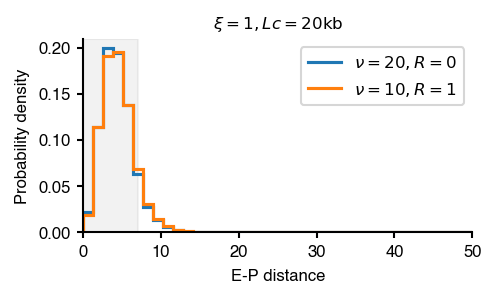

In [71]:
fig,ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
ax.set_ylabel("Probability density")
ax.set_xlabel("E-P distance")
r = np.linspace(0,50)
hist(ax,Simulation(B=20,F=14,A=1,L=20,R=0).distance,label=r"$\nu=20,R=0$",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=14,A=1,L=20,R=1).distance,label=r"$\nu=10,R=1$",bins=maxwell_bins)
histlegend(ax)
ax.set_xlim(0,50)
ax.axvspan(0,7,color="grey",alpha=0.1)
ax.set_title(r"$\xi=1,Lc=20\mathrm{kb}$")

# Figures

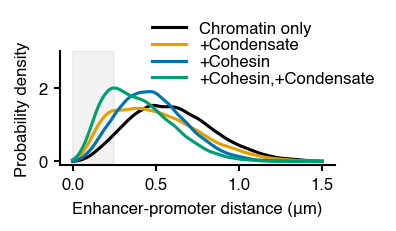

In [72]:
fig,ax = plt.subplots(figsize=(6*cm,2.5*cm))
ax.set_ylabel("Probability density")
ax.set_xlabel("Enhancer-promoter distance (μm)")
r = np.linspace(0,1500,1000)
ax.plot(r/1000,Simulation(B=0,F=14,A=1,L=150,R=0,unitful=True).distance_g(r)*1000,label=r"Chromatin only",color="#000000")
ax.plot(r/1000,Simulation(B=10,F=14,A=1,L=150,R=0,unitful=True).distance_g(r)*1000,label=r"+Condensate",color="#E69F00")
ax.plot(r/1000,Simulation(B=0,F=14,A=1,L=100,R=0,unitful=True).distance_g(r)*1000,label=r"+Cohesin",color="#0072B2")
ax.plot(r/1000,Simulation(B=10,F=14,A=1,L=100,R=0,unitful=True).distance_g(r)*1000,label=r"+Cohesin,+Condensate",color="#009E73")
# histlegend(ax,loc="upper right",bbox_to_anchor=(1.1,1.4),labelspacing = 0.1)
ax.axvspan(0,Constants.R*Constants.Lk/1000,color="grey",alpha=0.1)
ax.set_ylim(top=3)
ax.legend(frameon=False,loc="upper right",bbox_to_anchor=[1.2, 1.4],labelspacing = 0.1)
fig.savefig("brownian_distribution.pdf",transparent=True,bbox_inches="tight")

In [73]:
maxwell_bins = np.linspace(0,50,31)

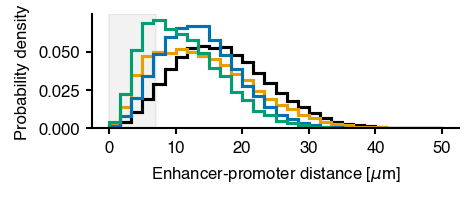

In [74]:
fig,ax = plt.subplots(figsize=(8*cm,2.5*cm))
ax.set_ylabel("Probability density")
ax.set_xlabel("Enhancer-promoter distance [$\mu$m]")
hist(ax,Simulation(B=0,F=14,A=1,L=150,R=0).distance,label=r"Chromatin only",color="#000000",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=14,A=1,L=150,R=0).distance,label=r"+Cohesin",color="#E69F00",bins=maxwell_bins)
hist(ax,Simulation(B=0,F=14,A=1,L=100,R=0).distance,label=r"+Condensate",color="#0072B2",bins=maxwell_bins)
hist(ax,Simulation(B=10,F=14,A=1,L=100,R=0).distance,label=r"+Cohesin,+Condensate",color="#009E73",bins=maxwell_bins)

# histlegend(ax,loc="upper right",bbox_to_anchor=(1.1,1.4),labelspacing = 0.1)
ax.axvspan(0,Constants.R,color="grey",alpha=0.1)
fig.savefig("bd_indiv.pdf")